# Active Satellites Analysis

In this report, we'll be analyzing a dataset that depicts the active satellites in orbit around our Earth as of July 2016.  It takes data from countries and their satellite usage, including information on satellites that are multinational. Satellites can provide a multitude of tasks for society, such as gathering data on Earth and Space and enhancing communication worldwide. So, from this dataset, we’ll take a look at what’s out there at any given point in time. 

Some of the main questions we'll be asking are: What countries have the most active satellites? What are their main purposes? Is there a trend in Satellite launches over time? Is there any correlation between a satellite's power wattage and it's operating country, or potentially it's purpose? What about a relation between a satellite's life expectancy dependent upon the country or purpose? 

It is important to note that this dataset contains information it could gather as of the specified date, but as satellites are consistently deactivated, launched, and even abandoned, there may be outdated information.

To reference the dataset used, please click on the attached link -- https://www.kaggle.com/ucsusa/active-satellites/version/1. 

In [188]:
#import our packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sp
from scipy.stats import ttest_ind

In [189]:
#set our graphic parameters and open our data 
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams.update({'font.size': 15})
df = pd.read_csv('Satellite_Data.csv')

In [190]:
#view our column names
df.columns

Index(['Official Name of Satellite', 'Country/Organization of UN Registry',
       'Operator/Owner', 'Country of Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of Geosynchronous Orbit (Degrees)', 'Perigee (Kilometers)',
       'Apogee (Kilometers)', 'Eccentricity', 'Inclination (Degrees)',
       'Period (Minutes)', 'Launch Mass (Kilograms)', 'Dry Mass (Kilograms)',
       'Power (Watts)', 'Date of Launch', 'Expected Lifetime (Years)',
       'Contractor', 'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number'],
      dtype='object')

In [191]:
#rename columns
df.rename(columns={'Official Name of Satellite': 'Satellite_Name', 'Country/Organization of UN Registry':'Country/Orgnization_of_UN_Registry',
       'Operator/Owner': 'Operator', 'Country of Operator/Owner':'Country_of_Operator', 'Users':'Users', 'Purpose':'Purpose',
       'Detailed Purpose':'Detailed_Purpose', 'Class of Orbit':'Class_of_Orbit', 'Type of Orbit':'Type_of_Orbit',
       'Longitude of Geosynchronous Orbit (Degrees)':'Longitude_of_Orbit_degrees', 'Perigee (Kilometers)': 'Perigee_kilometers',
       'Apogee (Kilometers)':'Apogee_kilometers', 'Eccentricity':'Eccentricity', 'Inclination (Degrees)':'Inclination_degrees',
       'Period (Minutes)':'Period_minutes', 'Launch Mass (Kilograms)':'Launch_Mass_kilograms', 'Dry Mass (Kilograms)':'Dry_Mass_kilograms',
       'Power (Watts)':'Power_watts', 'Date of Launch':'Date_of_Launch', 'Expected Lifetime (Years)':'Expected_Lifetime_years',
       'Contractor':'Contractor', 'Country of Contractor':'Country_of_Contractor', 'Launch Site':'Launch_Site', 'Launch Vehicle':'Launch_Vehicle',
       'COSPAR Number':'COSPAR_Number', 'NORAD Number':'NORAD_Number'}, inplace=True) 

In [192]:
#view the first 10 rows of our data 
df.head(10)

,Satellite_Name,Country/Orgnization_of_UN_Registry,Operator,Country_of_Operator,Users,Purpose,Detailed_Purpose,Class_of_Orbit,Type_of_Orbit,Longitude_of_Orbit_degrees,...,Dry_Mass_kilograms,Power_watts,Date_of_Launch,Expected_Lifetime_years,Contractor,Country_of_Contractor,Launch_Site,Launch_Vehicle,COSPAR_Number,NORAD_Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
6,ABS-6,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,159.00,...,1730,"6,800 (EOL)",9/26/1999,15,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0
7,ABS-7,South Korea,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,116.18,...,1800,4800,9/4/1999,15,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894.0
8,USA 139,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336.0
9,USA 171,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937.0


# Which countries have the most satellites in orbit? 

Text(0.5, 1.0, 'Satellite by Country Count')

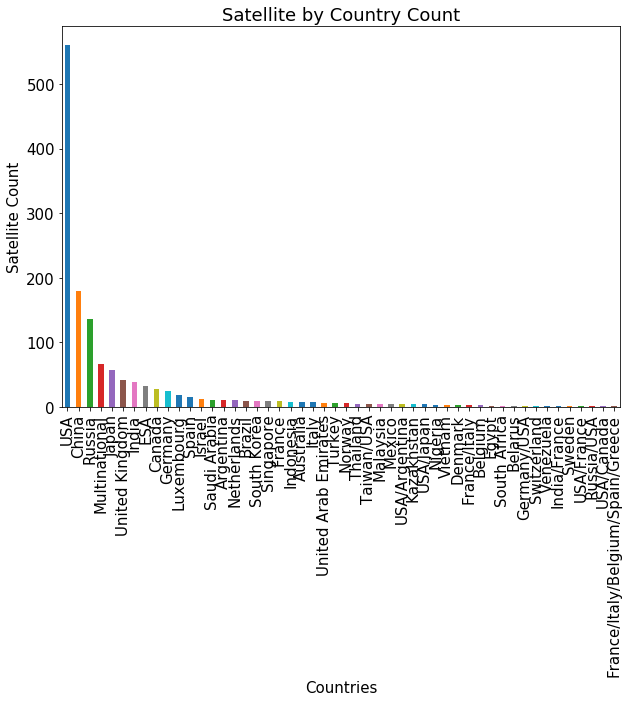

In [193]:
#Let's look to see which countries have the most Satellites in orbit
df.Country_of_Operator.value_counts().head(50).plot(kind = "bar")
plt.xlabel('Countries')
plt.ylabel('Satellite Count')
plt.title('Satellite by Country Count')

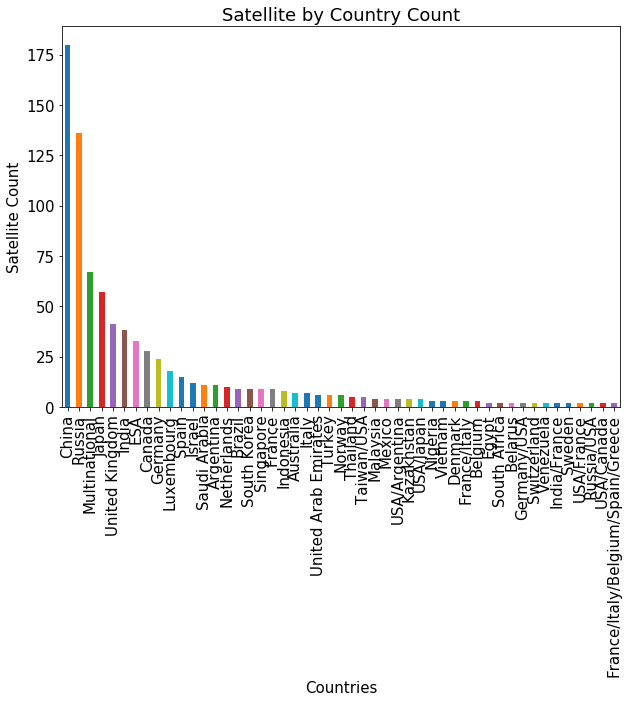

In [194]:
#We can very easily see the extensive amount of satellites the United States has in place. Let's remove them from the list to see a distribution amongst other countries.
df.Country_of_Operator.value_counts().head(50)[1:50].plot(kind = "bar")
plt.xlabel('Countries')
plt.ylabel('Satellite Count')
plt.title('Satellite by Country Count');

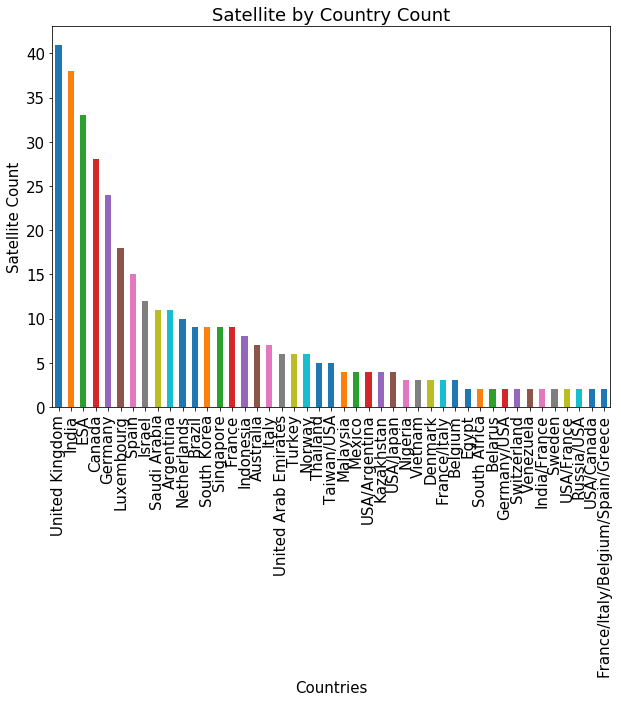

In [195]:
#A little better, but now we'll remove the top 5 countries from the list to see a distribution amongst the remaining countries. 
df.Country_of_Operator.value_counts().head(50)[5:50].plot(kind = "bar")
plt.xlabel('Countries')
plt.ylabel('Satellite Count')
plt.title('Satellite by Country Count');

So, it looks like the United States has the highest count of satellites. Opposed from the US, there are few other countries with high satellite counts.The next 2-4 countries have meaningfully larger numbers, China being next with approximately 1/3 of the US count.

# What are the top reasons we use satellites? 

''

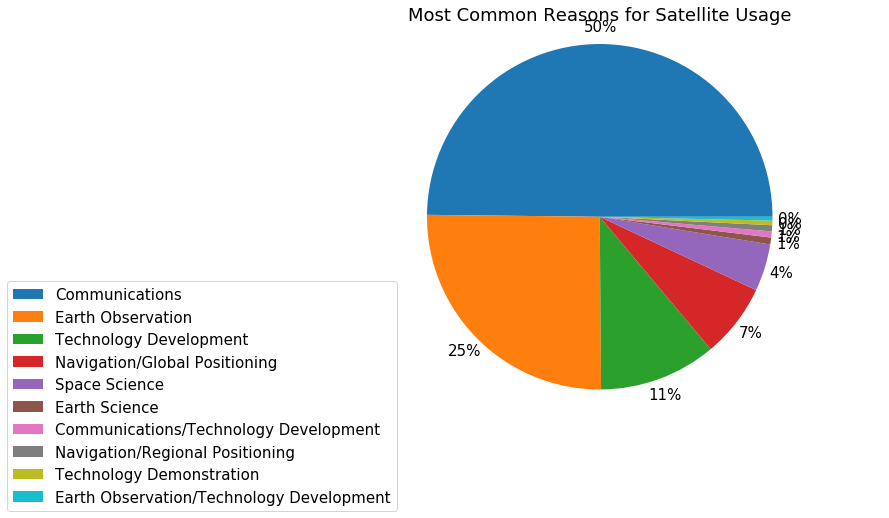

In [196]:
#Now, we'll create a pie chart to check the top ten reasons we use Satellites.
labels = df.Purpose.value_counts()
df.Purpose.value_counts().head(10).plot(kind = "pie",labels=None, autopct='%1.0f%%',pctdistance=1.1) #pctdistance=1.1 gets our percentages outside of the graphic
plt.axis('equal')
plt.title('Most Common Reasons for Satellite Usage')
plt.ylabel('')
plt.xlabel('')
plt.legend(bbox_to_anchor=(0.15,.35),loc="best",labels = labels.index)
; 

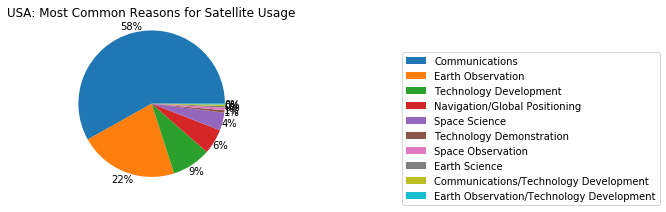

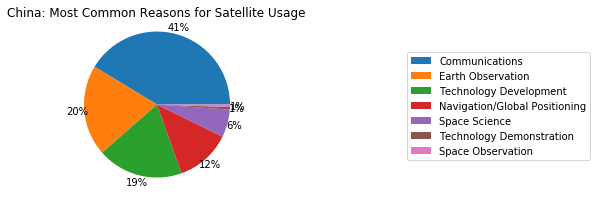

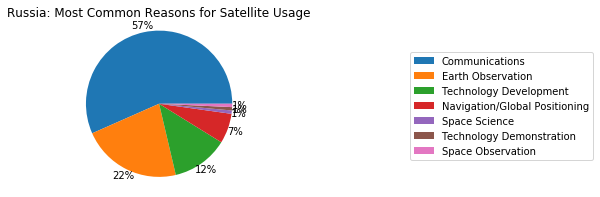

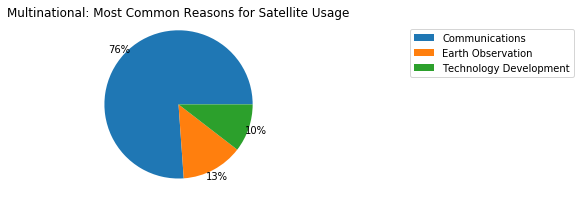

In [197]:
#Seems like communication purposes is the highest amount, lets now break this down by our top 4 countries (inclusive of multinational).
#We'll create the dataframes for our top 4 countries, and then create subplots for each pie chart.  
plt.figure(figsize=(15, 7)) #updating our figure sizes 
plt.rcParams.update({'font.size': 10})

#create dataframe for just the USA 
df2 = df[df['Country_of_Operator'] == "USA"] 
#create our labels
labels = df2.Purpose.value_counts() 
#subplot for USA with adjusted labels 
plt.subplot(1, 4, 1)
df2.Purpose.value_counts().head(10).plot(kind = "pie",labels=None,autopct='%1.0f%%',pctdistance=1.1) 
plt.axis('equal')
#move our chart closer to our title so there's less white space
plt.subplots_adjust(top=0.45) 
#label our graph properly  
plt.title('USA: Most Common Reasons for Satellite Usage') 
plt.ylabel('')
plt.xlabel('')
#position our legend 
plt.legend(bbox_to_anchor=(1.85,.85),loc="best",labels = labels.index) 
plt.show()

plt.figure(figsize=(15, 7)) 
plt.rcParams.update({'font.size': 10})

df3 = df[(df['Country_of_Operator'] == 'China')]
plt.subplot(1, 4, 2)
df3.Purpose.value_counts().head(10).plot(kind = "pie",labels=None,autopct='%1.0f%%',pctdistance=1.1)
plt.axis('equal')
plt.subplots_adjust(top=0.45)
plt.title('China: Most Common Reasons for Satellite Usage')
plt.ylabel('')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.85,.85),loc="best",labels = labels.index)
plt.show()

plt.figure(figsize=(15, 7)) 
plt.rcParams.update({'font.size': 10})
df4 = df[(df['Country_of_Operator'] == 'Russia')]
plt.subplot(1, 4, 3)
df4.Purpose.value_counts().head(10).plot(kind = "pie",labels=None,autopct='%1.0f%%',pctdistance=1.1)
plt.axis('equal')
plt.subplots_adjust(top=0.45)
plt.title('Russia: Most Common Reasons for Satellite Usage')
plt.ylabel('')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.85,.85),loc="best",labels = labels.index)
plt.show()

plt.figure(figsize=(15, 7)) 
plt.rcParams.update({'font.size': 10})
df4 = df[(df['Country_of_Operator'] == 'Multinational')]
plt.subplot(1, 4, 3)
df4.Purpose.value_counts().head(10).plot(kind = "pie",labels=None,autopct='%1.0f%%',pctdistance=1.1)
plt.axis('equal')
plt.subplots_adjust(top=0.45)
plt.title('Multinational: Most Common Reasons for Satellite Usage')
plt.ylabel('')
plt.xlabel('')
plt.legend(bbox_to_anchor=(2.70,.99),loc="best",labels = labels.index)
plt.show()

Our top 4 countries are rather consistent with our all encompasing pie chart. Showcasing that communications is the greatest reason for usage, with Earth observation coming in second, and technology development as third. 

# Are satellite launches increasing or decreasing? Can we spot a trend? 

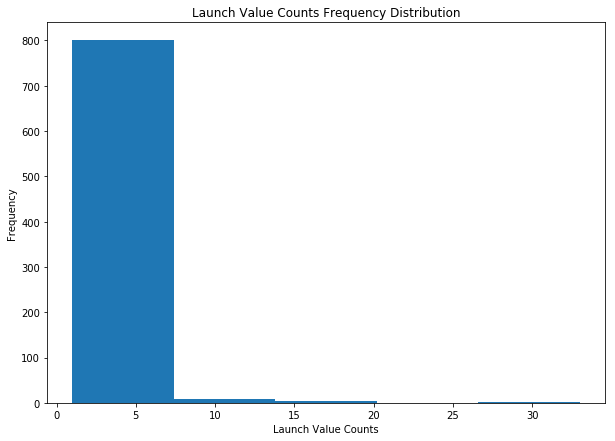

In [198]:
#Let's quickly create a histogram for distribution, and take a look at some measures of central tendancy and variance to see how often we might get multiple launches at once. 
plt.hist(df.Date_of_Launch.value_counts(),bins = 5)
plt.xlabel('Launch Value Counts')
plt.ylabel('Frequency')
plt.title('Launch Value Counts Frequency Distribution');

In [199]:
print("Mean -", np.mean(df.Date_of_Launch.value_counts()))
print("Median -", np.median(df.Date_of_Launch.value_counts()))
print("Mode -", statistics.mode(df.Date_of_Launch.value_counts()))
print("Variance -", np.var(df.Date_of_Launch.value_counts()))
print("Standard Deviation -", np.std(df.Date_of_Launch.value_counts(), ddof=1))
print("Standard Error -", np.std(df.Date_of_Launch.value_counts() ,ddof=1) / np.sqrt(len(df.Date_of_Launch.value_counts())))

Mean - 1.7438423645320198
Median - 1.0
Mode - 1
Variance - 4.1856147928850485
Standard Deviation - 2.0471384532765913
Standard Error - 0.07184047604676082


So, our most common launch value is 1 per the mode, which is of no surprise. However, we can see that the average degree to which each point differs from the mean is 4.18, the variance. We can see per the graphic that there has even been a time in which 30 satellites were launched on one occasion. 

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:1437: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  str(type(self)))


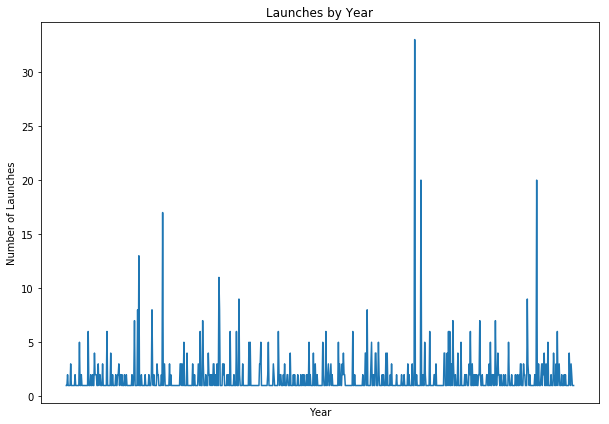

In [200]:
#Now, we'll evaluate the launches overtime with a line plot  
plt.plot(df.Date_of_Launch.value_counts().sort_index())
plt.title('Launches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.locator_params(axis='x', nbins=10)
plt.tick_params(
    axis='x',          #references x-axis
    which='both',      #both major and minor ticks are affected
    bottom=False,      #ticks along the bottom edge are off
    top=False,         #ticks along the top edge are off
    labelbottom=False); #labels along the bottom edge are off to have no tix at all 

Well, from what's showcased on this graph, it's pretty apparent that satellite launches have not significantly increased or decreased overtime. 

# Is there a link between a satellites power wattage by country, or power wattage by it's purpose? 

In [201]:
#Before we look into this, we'll need to create a new dataframe and edit Power_watts column removing the ,()BEOL  
df6 = df.copy()
df6['Power_watts'] = df.Power_watts.dropna().str.extract('(\d+)', expand=True).astype(int)
df6.head(10)

,Satellite_Name,Country/Orgnization_of_UN_Registry,Operator,Country_of_Operator,Users,Purpose,Detailed_Purpose,Class_of_Orbit,Type_of_Orbit,Longitude_of_Orbit_degrees,...,Dry_Mass_kilograms,Power_watts,Date_of_Launch,Expected_Lifetime_years,Contractor,Country_of_Contractor,Launch_Site,Launch_Vehicle,COSPAR_Number,NORAD_Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000.0,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000.0,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400.0,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
6,ABS-6,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,159.00,...,1730,6.0,9/26/1999,15,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0
7,ABS-7,South Korea,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,116.18,...,1800,4800.0,9/4/1999,15,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894.0
8,USA 139,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336.0
9,USA 171,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937.0


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


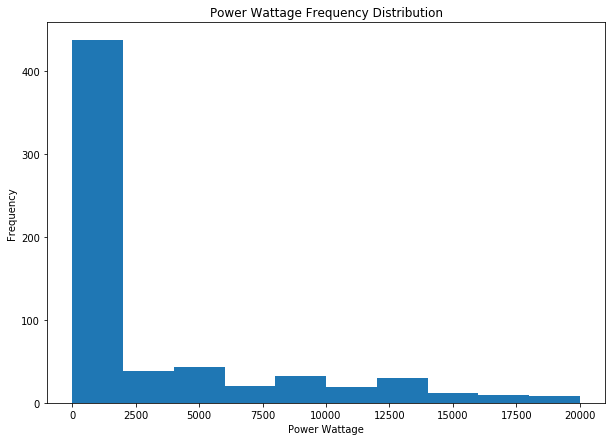

In [202]:
#We'll take a quick look here at the frequncy distribution of Power Wattage 
plt.hist(df6['Power_watts'],bins = 10)
plt.xlabel('Power Wattage')
plt.ylabel('Frequency')
plt.title('Power Wattage Frequency Distribution');

In [203]:
print("Mean -", np.mean(df6['Power_watts']))
print("Median -", np.median(df6['Power_watts']))
print("Mode -", statistics.mode(df6['Power_watts']))
print("Variance -", np.var(df6['Power_watts']))
print("Standard Deviation -", np.std(df6['Power_watts'], ddof=1))
print("Standard Error -", np.std(df6['Power_watts'] ,ddof=1) / np.sqrt(len(df6['Power_watts'])))

Mean - 3383.845916795069
Median - nan
Mode - 1.0
Variance - 23409129.8961351
Standard Deviation - 4842.03005944739
Standard Error - 128.49413615324661


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


From the above measures of central tendancy, we can certainly see that the mean is not really meaningful, as the variation in the data set is very large. 

''

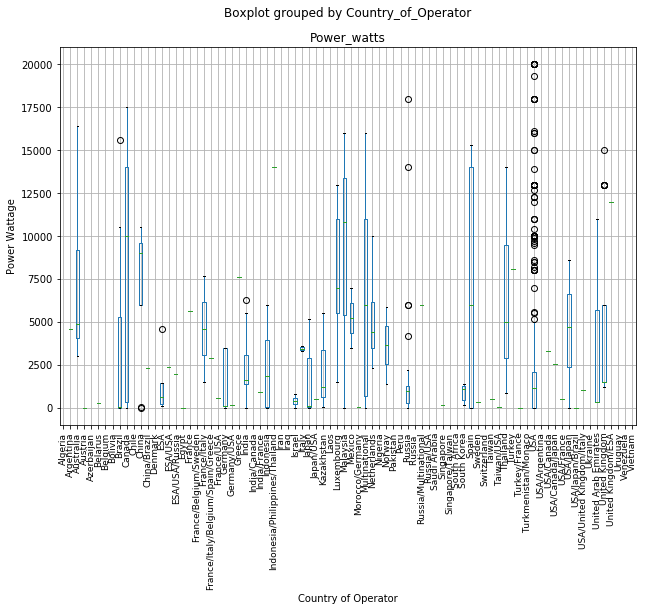

In [204]:
#However, from the above histogram, we can definitely see that overall less powerage is needed for the majority of satellites given the peak. Now that we have an idea of it's frequency, lets take a look at it by country, and create the boxplot for powerage by country of operator 
df6.boxplot(column = 'Power_watts', by = 'Country_of_Operator' )
plt.xticks(fontsize=9, rotation=90)
plt.xlabel('Country of Operator')
plt.ylabel('Power Wattage')
;

As we can see here, it is extreamly variable by country as to whether or not the power wattage values cluster and relate to one another. Canada and Spain both have large inner quartile ranges so their values rarely cluster, while the United States has a smaller quartile range, but a multitude of fliers above the maximum value, showcasing that many points extend out of the norm. 

In [205]:
#Now, let's apply a t-test to our top two satellite owning countries (the USA and China), and compare their average satellite power wattage to see if there's any relations.

#create the dataframes 
df8 = df6[(df6['Country_of_Operator'] == 'USA')]
df9 = df6[(df6['Country_of_Operator'] == 'China')] 

In [206]:
#grab a sample from the dataset 
sample1 = np.random.choice(df8.Power_watts.notnull(), 20, replace=True)
sample2 = np.random.choice(df9.Power_watts.notnull(), 20, replace=True)

In [207]:
print(ttest_ind(sample2, sample1, equal_var=False)) 

Ttest_indResult(statistic=-5.338539126015655, pvalue=3.7534490241919566e-05)


The p value in this case is equal to 3.753 * 10^(-5) or 0.0000375, and so seeing as our p value is less than .05 by a long shot, there is a significant difference between these two means and real difference in the population, not due to variability in the samples. 

''

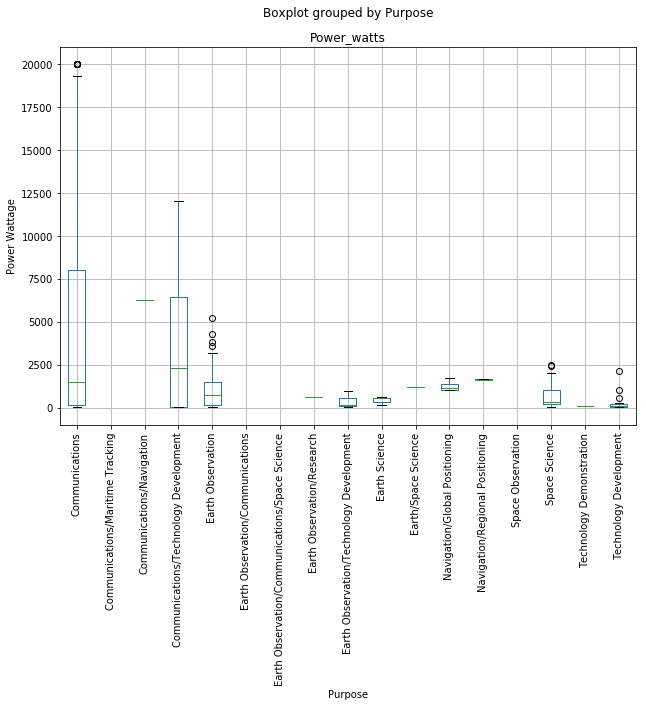

In [208]:
#Now, we'll create the boxplot for powerage by satellite purpose
df6.boxplot(column = 'Power_watts', by = 'Purpose' )
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Power Wattage')
;

We can see where a large range of that variability comes from in our by countries graphic; communications. If we look at the other purpose reasons, we'll see that the medians are relatively close to one another and within a similar range, generally below 2,500 despite a few fliers in Earth Observation. So, from this we can say that the power wattage needed for communication varies widely, while the other purposes with maybe less frequncy, generally require less powerage. 

# Is there a relationship between a satellite's expected lifetime and it's country, or expected lifetime and it's purpose? 

In [209]:
#Again, we'll need to create a new dataframe here and edit the Expected_Lifetime_years column removing any excess characters from the integer 
df7 = df.copy()
df7['Expected_Lifetime_years'] = df.Expected_Lifetime_years.dropna().str.extract('(\d+)', expand=True).astype(int)
df7.head(10)

,Satellite_Name,Country/Orgnization_of_UN_Registry,Operator,Country_of_Operator,Users,Purpose,Detailed_Purpose,Class_of_Orbit,Type_of_Orbit,Longitude_of_Orbit_degrees,...,Dry_Mass_kilograms,Power_watts,Date_of_Launch,Expected_Lifetime_years,Contractor,Country_of_Contractor,Launch_Site,Launch_Vehicle,COSPAR_Number,NORAD_Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15.0,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12.0,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
6,ABS-6,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,159.00,...,1730,"6,800 (EOL)",9/26/1999,15.0,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0
7,ABS-7,South Korea,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,116.18,...,1800,4800,9/4/1999,15.0,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894.0
8,USA 139,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336.0
9,USA 171,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937.0


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


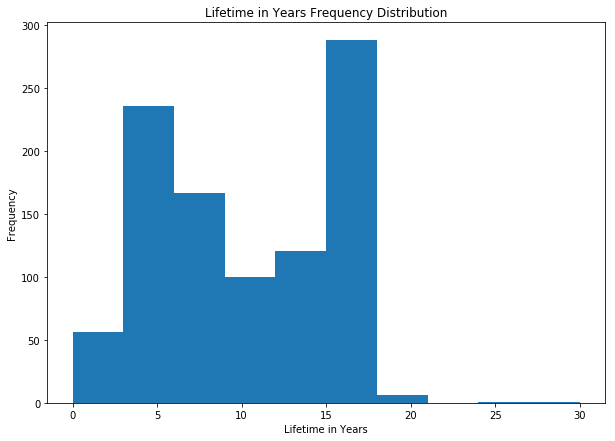

In [210]:
#We'll take a quick look here at the frequncy distribution of Expected Lifetime
plt.hist(df7['Expected_Lifetime_years'],bins = 10)
plt.xlabel('Lifetime in Years')
plt.ylabel('Frequency')
plt.title('Lifetime in Years Frequency Distribution');

In [211]:
print("Mean -", np.mean(df7['Expected_Lifetime_years']))
print("Median -", np.median(df7['Expected_Lifetime_years']))
print("Mode -", statistics.mode(df7['Expected_Lifetime_years']))
print("Variance -", np.var(df7['Expected_Lifetime_years']))
print("Standard Deviation -", np.std(df7['Expected_Lifetime_years'], ddof=1))
print("Standard Error -", np.std(df7['Expected_Lifetime_years'] ,ddof=1) / np.sqrt(len(df6['Power_watts'])))

Mean - 9.587090163934427
Median - nan
Mode - 15.0
Variance - 22.203480877116366
Standard Deviation - 4.714472788978209
Standard Error - 0.12510911766352784


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


This frequency distribution is much less variable than that of our power wattage distribution given our standard deviation of 4.7. We can see that we have two peaks at around 4 and around 16 giving us a mean of 9.58.  

''

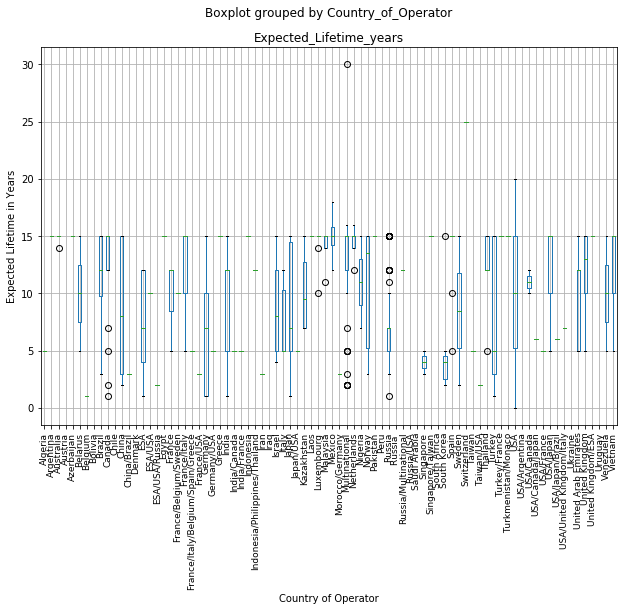

In [212]:
#Now that we have an idea on this frequency, lets take a look at it by country, and create a boxplot for expected lifetime by country. 
df7.boxplot(column = 'Expected_Lifetime_years', by = 'Country_of_Operator' )
plt.xticks(fontsize=9, rotation=90)
plt.xlabel('Country of Operator')
plt.ylabel('Expected Lifetime in Years')
;

Again, similar to the Power Wattage by Country, this is extreamly varaible by country. Which, is to be expected considering each country has a different amount of satellite's launched. Looking towards are top 4 countries we evaluated earlier in the study, we can see that the United States has a large quartile range, and thus the data doesnt really cluster near one another, Japan and China being similar. Russia and our Multinational segments both have fliers, showcasing that many points extend out of the norm. 

In [213]:
#Let's now apply a t-test to our top two satellite owning countries (the USA and China), and compare their average lifetime expectancy to see if there's any relations.
#create the dataframes 
df10 = df7[(df7['Country_of_Operator'] == 'USA')]
df11 = df7[(df7['Country_of_Operator'] == 'China')] 

In [214]:
#grab a sample from the dataset 
sample1 = np.random.choice(df8.Expected_Lifetime_years.notnull(), 20, replace=True)
sample2 = np.random.choice(df9.Expected_Lifetime_years.notnull(), 20, replace=True)

In [215]:
print(ttest_ind(sample2, sample1, equal_var=False)) 

Ttest_indResult(statistic=-0.6324555320336761, pvalue=0.5308833462879936)


Seeing as there is a p value that is greater than .05, we can conclude that there isn't a significant difference between the two sample means. Therefore, according to the t value, the two groups are about .6x as different from one another as they are within eachother. This also means that it is a relatively small possibiliy that the difference is reliable. We can also see this within the box plot, as the data doesnt cluster near one another and thus is harder to spot a difference with the noise.  

''

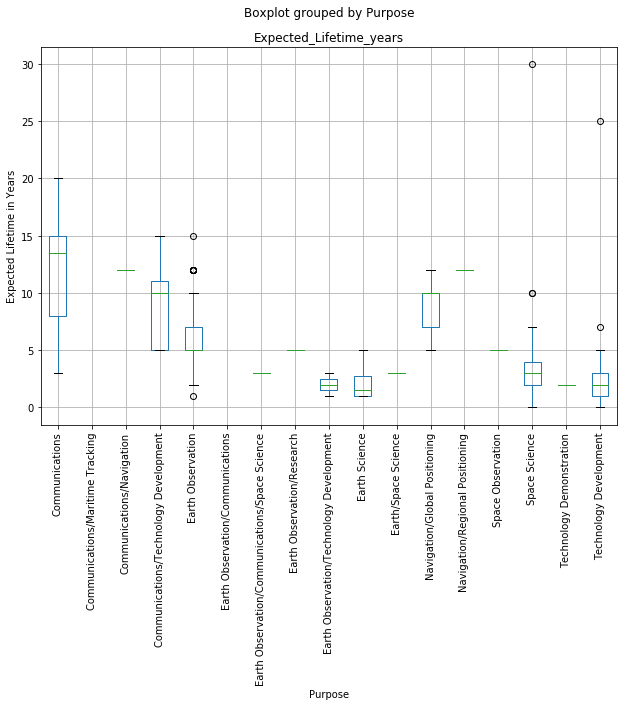

In [216]:
#Now, we'll create the boxplot for powerage by satellite purpose
df7.boxplot(column = 'Expected_Lifetime_years', by = 'Purpose' )
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Expected Lifetime in Years')
;

We can see that the expected lifetime for communications tends to be the longest, and a mix between communications and technology development come second. We can also see that suprisingly, space science has an outlier with an expected lifetime of 30 years and techonology development with an outlier at 25 years. 

# Conclusion 

Through this analysis, we identified the United States with an exceptionally large amount of satellites in space, and the main reason for a majority of the satellites out there, is for communication purposes. We also found that through the years, there isn't much of an increase in satellite launches. Power wattage and lifetime expectancy per satellite is extreamly variable by country. Our communication satellites, however, tend to use the most variations of power wattages in satellites, and tend to have higher life expectancies; perhaps this is because the sheer number and demand of these satellites.

# Further Research

1. Further analyze recent launches and take a closer look into what countries have been launching the most satellites in the more recent years. To do so, I'd need to remove x amount of years from the data set to only display the recent say 10 years in a new dataframe.   
2. Research more recent data for current, up to date satellites in space as well as ones that were deactivated, and those reasons why. 
3. It would also be interesting to create a predictive model showcasing the number of expected launches per year by country in the future. 
